# 2. 读取数据和数据分析

## 2.1 数据读取
一般都是用pandas库将数据读取为dataframe结构。
（DataFrame是一个【表格型】的数据结构，可以看做是【由Series组成的字典】（共用同一个索引）。DataFrame由按一定顺序排列的多列数据组成。设计初衷是将Series的使用场景从一维拓展到多维。DataFrame既有行索引，也有列索引。）

In [2]:
# 读取数据，文件为csv类型，所以用read_csv函数
import pandas as pd
# train = pd.read_csv("input/train_set.csv", sep="\t", nrows=100)
train = pd.read_csv("input/train_set.csv", sep="\t")

上述代码说明：
1. ../input/train_set.csv：文件路径，根据训练集位置自己修改。
2. sep="\t"：分隔符，每个字符直接有一个tab（4个空格）距离。
3. nrows=100：通过之前数据的初步认识知道数据集比较大，所以少读取100行先观察一下。

In [3]:
# 查看数据前五行
train.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


代码说明:
1. train.head(x)：查看数据前x行（默认前5行）。
2. 同理：train.tail()；查看数据后5行。

输出结果说明:
1. 数据只有2列，label列为新闻类别，text列为新闻内容。

## 2.2 简单数据分析

### 2.2.1 语句的长度分析

In [6]:
%pylab inline
train["text_len"] = train["text"].apply(lambda x: len(x.split(" ")))
train["text_len"].describe()

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


代码说明：
1. %pylab inline：pylab是 Matplotlib 和Ipython提供的一个模块，提供了类似Matlab的语法。
2. apply()：会自动遍历每一行DataFrame的数据，最后将所有结果组合成一个Series数据结构并返回。
3. lambda x: len(x.split(" "))：lambda匿名函数，split()将text文本用空格进行切片。

**apply()详细介绍**  
pandas.DataFrame.apply  
DataFrame.apply(self, func, axis=0, raw=False, result_type=None, args=(), **kwds)

Parameters：
1. func：function
    - Function to apply to each column or row.
2. axis：{0 or ‘index’, 1 or ‘columns’}, default 0
    Axis along which the function is applied:
    - 0 or ‘index’: apply function to each column.
    - 1 or ‘columns’: apply function to each row.

3. raw：bool, default False
    Determines if row or column is passed as a Series or ndarray object:
    - False : passes each row or column as a Series to the function.
    - True : the passed function will receive ndarray objects instead. If you are just applying a NumPy reduction function this will achieve much better performance.

4. result_type{‘expand’, ‘reduce’, ‘broadcast’, None}, default None
    These only act when axis=1 (columns):
    - ‘expand’ : list-like results will be turned into columns.
    - ‘reduce’ : returns a Series if possible rather than expanding list-like results. This is the opposite of ‘expand’.
    - ‘broadcast’ : results will be broadcast to the original shape of the DataFrame, the original index and columns will be retained.

The default behaviour (None) depends on the return value of the applied function: list-like results will be returned as a Series of those. However if the apply function returns a Series these are expanded to columns.

args：tuple
    Positional arguments to pass to func in addition to the array/series.

\*\*kwds
    Additional keyword arguments to pass as keywords arguments to func.

Returns:
    Series or DataFrame  
    Result of applying func along the given axis of the DataFrame.

输出说明：
1. mean 907.207110：每个句子平均由907个字符组成。  
2. min 2.000000：最短的句子由两个字符组成。  
3. max 57921.000000：最长的句子由57921个字符组成。

### 2.2.2 简单可视化

Text(0.5, 1.0, 'Histogram of char count')

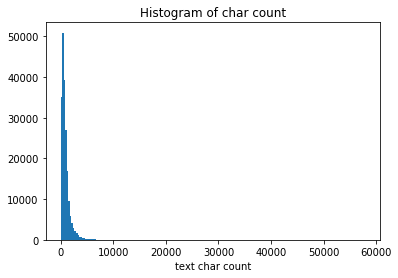

In [15]:
# 句子长度绘制成直方图
_ = plt.hist(train["text_len"], bins = 200)
plt.xlabel("text char count")  # 横坐标
plt.title("Histogram of char count")  # 图表标题

输出说明：  
可见大部分句子长度集中在2000字符以内。

Text(0.5, 0, 'category')

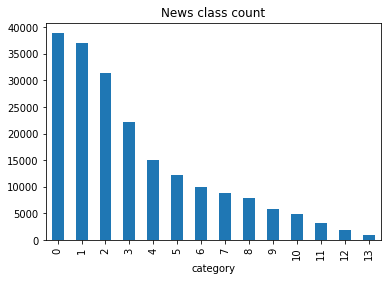

In [16]:
# 新闻类别分布
train["label"].value_counts().plot(kind="bar")
plt.title("News class count")
plt.xlabel("category")

**今天练车学了一部分，晚上看了阿水老师的直播，有点感触，明天继续淦**